<a href="https://colab.research.google.com/github/Vaelastraszz/Pneumothorax_Detection/blob/master/SIIM_Pneumothorax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


<h2> Loading des données </h2>

<h3> Chargement de la première liste </h3>

In [0]:
import os

#Fonction de parcours de fichier
def get_images(check_list) :
    
    img_list = []
    start_path = '/content/gdrive/My Drive/Competition/dicom-images-train/' # current directory
    count = 0
    
    for path,dirs,files in os.walk(start_path):
        for filename in files:
             if os.path.join(path,filename) not in check_list :
                    img_list.append(os.path.join(path,filename))
                    
                    count+=1
                    if count%100==0:
                        print(count)
                    if len(img_list)==3000 :
                        return img_list
       
    return img_list

#Chunking pour éviter la paralysie de l'itérateur de fichier 
def merge_list():
    
    check_list = []
    
    for i in range(1,5):
        
        print(i)
        check_list = check_list + get_images(check_list)
        print(len(check_list))
    
    return check_list
    
    

In [0]:
train_list = merge_list(train_list)

In [0]:
train_list[:5]

['/content/gdrive/My Drive/Competition/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.301.1517875162.280318/1.2.276.0.7230010.3.1.3.8323329.301.1517875162.280317/1.2.276.0.7230010.3.1.4.8323329.301.1517875162.280319.dcm',
 '/content/gdrive/My Drive/Competition/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4949.1517875185.638864/1.2.276.0.7230010.3.1.3.8323329.4949.1517875185.638863/1.2.276.0.7230010.3.1.4.8323329.4949.1517875185.638865.dcm',
 '/content/gdrive/My Drive/Competition/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3557.1517875178.403983/1.2.276.0.7230010.3.1.3.8323329.3557.1517875178.403982/1.2.276.0.7230010.3.1.4.8323329.3557.1517875178.403984.dcm',
 '/content/gdrive/My Drive/Competition/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.4041.1517875180.837149/1.2.276.0.7230010.3.1.3.8323329.4041.1517875180.837148/1.2.276.0.7230010.3.1.4.8323329.4041.1517875180.837150.dcm',
 '/content/gdrive/My Drive/Competition/dicom-images-train/1.2.276.0.7230010.3.1.2.83233

<h3> Sérialisation de la liste de chemins des radios </h3>

In [0]:
import pickle

pickle.dump(train_list, open('/content/gdrive/My Drive/Competition/train_path.pkl','wb'))

<h3> Loading de la liste </h3>

In [0]:
import pickle

train_list = pickle.load(open('/content/gdrive/My Drive/Competition/train_path.pkl','rb'))

<h3> Complétion de la liste </h3>

In [0]:
second_train = []
second_train = get_images(train_list)

In [0]:
train_list = train_list + second_train

<h3> Récupération du dataset de radios saines </h3>

In [0]:
df_train = pd.read_csv("/content/gdrive/My Drive/Competition/train-rle.csv")

In [0]:
df = pd.read_csv("/content/gdrive/My Drive/Competition/sample_submission.csv")

In [0]:
df.head(5)

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.6567.151787519...,-1
1,1.2.276.0.7230010.3.1.4.8323329.6170.151787519...,-1
2,1.2.276.0.7230010.3.1.4.8323329.6346.151787519...,-1
3,1.2.276.0.7230010.3.1.4.8323329.6890.151787520...,-1
4,1.2.276.0.7230010.3.1.4.8323329.6400.151787519...,-1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 2 columns):
ImageId          1484 non-null object
EncodedPixels    1484 non-null int64
dtypes: int64(1), object(1)
memory usage: 23.3+ KB


In [0]:
df_train.columns = ['Id', 'Code']

In [0]:
df_train.head()

,Id,Code
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002...
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...


<h3> Observation des radios </h3>

In [0]:
pip install pydicom

     |████████████████████████████████| 7.1MB 5.0MB/s 


(1024, 1024)


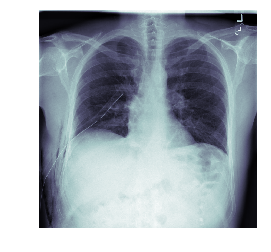

(1024, 1024)


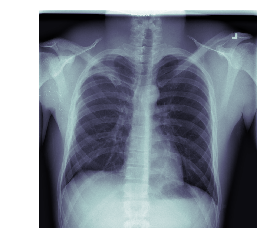

(1024, 1024)


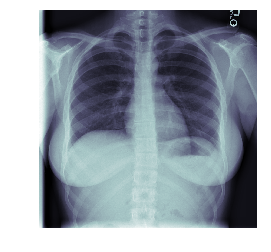

(1024, 1024)


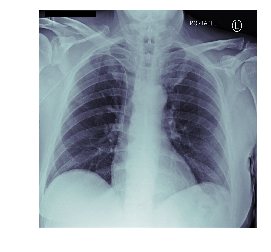

(1024, 1024)


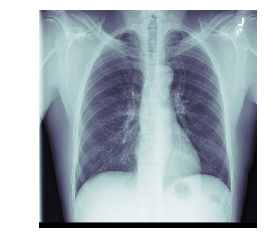

In [0]:
# show some images
import pydicom

sample = []

for k in range(5):
    fn = np.random.choice(train_list)
    img = pydicom.read_file(fn).pixel_array
    sample.append(img)
    plt.imshow(img, cmap='bone')
    plt.axis('off')
    plt.show()

<h2> Gestion des masques </h2>

<h3> Affichage test + fonctions auxiliaires </h3>

In [0]:
import mask

In [0]:
def get_dicom(path):
    
    sub = str.split(path,'/')   
    
    return sub[len(sub)-1][:-4] 
    

In [0]:
def get_rle(path):
    
    sub = str.split(path,'/')   
    
    return sub[len(sub)-1][:-4].replace(".", " ")

In [0]:
def get_code(path):
       return list(df_train["Code"][df_train.Id==get_dicom(path)])

In [0]:
mask_img = mask.rle2mask(get_code(train_list[0])[0],1024,1024).T

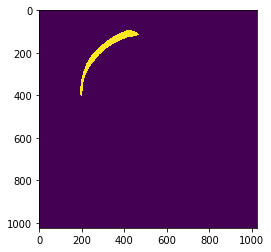

In [0]:
plt.imshow(mask_img)

[' 125434 12 987 62 948 81 938 88 926 100 919 106 913 111 909 116 905 119 903 121 900 125 897 127 895 129 893 131 891 133 889 135 888 136 887 137 886 138 885 139 885 139 884 139 885 139 885 138 885 139 886 137 887 136 888 134 890 106 919 100 925 94 931 83 942 77 949 65 962 57 969 45 987 27', ' 427553 18 1001 27 993 33 989 38 984 41 980 45 817 52 102 54 817 208 817 207 818 206 819 205 820 204 822 202 824 200 827 197 829 194 832 110 18 64 834 103 27 59 838 95 37 53 840 89 46 48 842 83 53 44 846 76 62 37 851 69 82 17 859 61 965 55 972 47 982 37 992 27', ' 159138 9 1011 13 1007 16 1004 20 1001 22 999 25 997 26 998 26 998 25 998 26 998 26 998 25 998 25 999 25 999 24 1000 23 1001 23 1001 22 1002 21 1003 21 1003 20 1004 20 1004 19 1005 19 1005 19 1005 18 1006 17 1008 16 1008 15 1009 15 1009 14 1010 14 1010 14 1010 14 1010 13 1011 13 1011 13 1011 12 1012 12 1012 11 1013 11 1013 10 1014 10 1014 10 1013 11 1013 10 1013 11 1013 11 1012 12 1012 12 1012 12 1012 12 1012 12 1012 12 1012 12 1012 12 10

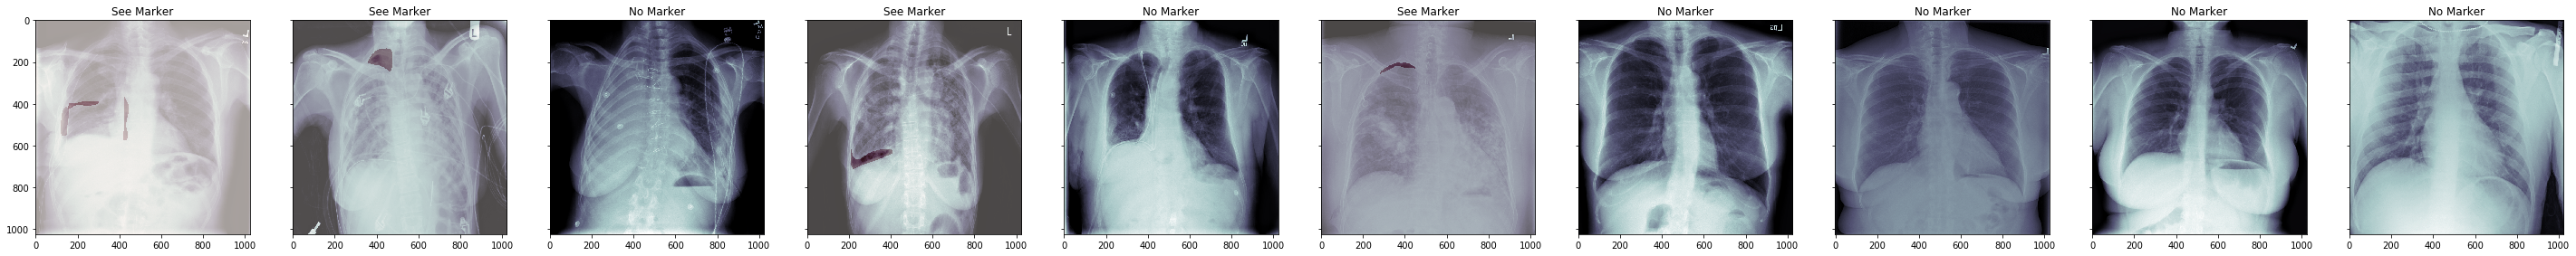

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=10, sharey=True, figsize=(50,10))

for i in range(10):
    
    fn = np.random.choice(train_list)
    liste_enc = get_code(fn)
    img = pydicom.read_file(fn).pixel_array
    ax[i].imshow(img, cmap='bone')
        
    if " -1" not in liste_enc:
        
        if len(liste_enc)==1 :
            mask_img = mask.rle2mask(liste_enc[0],1024,1024).T
            ax[i].imshow(mask_img,alpha=0.3, cmap="Reds")
            ax[i].set_title('See Marker')
            
        else :
            ax[i].set_title('See Marker')
            for j in range(len(liste_enc)):
                mask_img = mask.rle2mask(liste_enc[j],1024,1024).T
                ax[i].imshow(mask_img,alpha=0.3, cmap="Reds")
                                
        
    else :
        ax[i].set_title('No Marker')

<h2> Création du dataset d'entraînement + validation </h2>

In [0]:
def create_training_set(train_list):
    
    x=[]
    y=[]
    
    for i in range(len(train_list)):
        
        if i % 100 == 0 :
            print("Avancement du traitement",i,"chemin /", len(train_list))
          
        liste_enc = get_code(train_list[i])

        if " -1" not in liste_enc:

            if len(liste_enc)==1 :
                
                y.append(liste_enc[0])
                x.append(train_list[i])

            else :
                for j in range(len(liste_enc)):
                    
                    y.append(liste_enc[j])                        
                    x.append(train_list[i])
                    
        else :
            
            y.append("-1")
            x.append(train_list[i])
                             
    
    return x,y

In [0]:
x,y = create_training_set(train_list)

Avancement du traitement 0 chemin / 10712
Avancement du traitement 100 chemin / 10712
Avancement du traitement 200 chemin / 10712
Avancement du traitement 300 chemin / 10712
Avancement du traitement 400 chemin / 10712
Avancement du traitement 500 chemin / 10712
Avancement du traitement 600 chemin / 10712
Avancement du traitement 700 chemin / 10712
Avancement du traitement 800 chemin / 10712
Avancement du traitement 900 chemin / 10712
Avancement du traitement 1000 chemin / 10712
Avancement du traitement 1100 chemin / 10712
Avancement du traitement 1200 chemin / 10712
Avancement du traitement 1300 chemin / 10712
Avancement du traitement 1400 chemin / 10712
Avancement du traitement 1500 chemin / 10712
Avancement du traitement 1600 chemin / 10712
Avancement du traitement 1700 chemin / 10712
Avancement du traitement 1800 chemin / 10712
Avancement du traitement 1900 chemin / 10712
Avancement du traitement 2000 chemin / 10712
Avancement du traitement 2100 chemin / 10712
Avancement du traiteme

<h3> Splitting des sets Train/Validation </h3>

In [0]:
from sklearn import model_selection

In [0]:
z = []
for i in y:
    if y==" -1":
        z.append(0)
        
    else :
        z.append(1)

In [0]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(x, y, test_size=0.1,stratify=z, random_state=1)

In [0]:
X_train = list(set(X_train))

In [0]:
X_val = list(set(X_val))

<h3> Saving Images + Masks </h3>

In [0]:
import pydicom

def data_saving(list_IDs,train_bool = True):
  
    count = 0

    for i, ID in enumerate(list_IDs):
        try :
            
            if train_bool == True :
                path_x = "/content/gdrive/My Drive/Competition/train_im/0/" + get_dicom(ID) + ".jpg"
                path_y = "/content/gdrive/My Drive/Competition/train_mask/0/" + get_dicom(ID) + ".jpg"
                
            else :
                path_x = "/content/gdrive/My Drive/Competition/val_im/0/" + get_dicom(ID) + ".jpg"
                path_y = "/content/gdrive/My Drive/Competition/val_mask/0/" + get_dicom(ID) + ".jpg"
                
            array = resize_im(pydicom.read_file(ID).pixel_array)
            
            rle = get_code(ID)
            
            if rle is None or rle[0] == " -1":                  
                y = np.zeros((256, 256))
                plt.imsave(path_y, y)
                plt.imsave(path_x, array)
                count+=1
                
            else:
                if len(rle) == 1:
                    arr_y = resize_im(mask.rle2mask(rle[0], 1024, 1024).T)
                    plt.imsave(path_y, arr_y )
                    plt.imsave(path_x, array)
                    count+=1
                else: 
                    y = np.zeros((256, 256))

                    for x in rle:
                        y =  y + resize_im(mask.rle2mask(x, 1024, 1024).T)
                    plt.imsave(path_y, y)
                    plt.imsave(path_x, array)
                    count+=1
                
            if count % 100 == 0 :
                print(count,"images sauvées")
        except :
            
            print("Cannot load this image:",ID)



In [0]:
data_saving(X_val,train_bool=False)

100 images sauvées
600 images sauvées
700 images sauvées
1000 images sauvées
1100 images sauvées
1400 images sauvées
1800 images sauvées
2100 images sauvées
2200 images sauvées


<h2> Création d'un data generator </h2>

<h3> Custom generator 1 </h3>

In [0]:
from tensorflow import keras
import pydicom
from tensorflow.python.keras.utils import Sequence

In [0]:
import random

def imageLoader(list_IDs_temp, batch_size):
    
    L = len(list_IDs_temp)
    random.shuffle(list_IDs_temp)
    
    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
            X,Y = data_generation(list_IDs_temp[batch_start:limit],batch_size,(256,256),1)
            
            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

In [0]:
from skimage.transform import resize

def resize_im(input_arr):
    
    IMG_PX_SIZE = 256
    
    resized = resize(input_arr, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
    
    return resized

In [0]:
import random

def data_generation(list_IDs_temp,batch_size,dim,n_channels):
    'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
    # Initialization
    X = np.empty((batch_size, *dim, n_channels))
    y = np.empty((batch_size, *dim, n_channels))
    
    random.shuffle(list_IDs_temp)
    
    # Generate data
    for i, ID in enumerate(list_IDs_temp):
        # Store sample
        try :
            
            X[i,] = np.expand_dims(resize_im(pydicom.read_file(ID).pixel_array), axis=2)
            rle = get_code(ID)
            X[i,] /= 255.
            
            if rle[0] == " -1" or rle is None:                
                y[i,] = np.zeros((256, 256, 1))
                
            else:
                if len(rle) == 1:
                    y[i,] = np.expand_dims(resize_im(mask.rle2mask(rle[0], 1024, 1024).T), axis=2)
                    y[i,] /= 255.
                else: 
                    y[i,] = np.zeros((256, 256, 1))
                    for x in rle:
                        y[i,] =  y[i,] + np.expand_dims(resize_im(mask.rle2mask(x, 1024, 1024).T), axis=2)
                    y[i,] /= 255.
                        
        except :
            
            print("Cannot load this image:",ID)

    return X, y

<h3> Custom generator 2 </h3>

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# we create two instances with the same arguments
data_gen_args = dict(rotation_range=30,
                     vertical_flip = True,
                     horizontal_flip=True,
                     rescale=1./255)

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
seed = 1

image_train_generator = image_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Competition/train_im',
    batch_size=32,
    color_mode ="grayscale",
    #shuffle =False,
    class_mode=None,
    seed=seed)

mask_train_generator = mask_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Competition/train_mask',
    batch_size=32,
    color_mode ="grayscale",
    #shuffle = False,
    class_mode=None,
    seed=seed)

# combine generators into one which yields image and masks
train_generator = zip(image_train_generator, mask_train_generator)

Found 8629 images belonging to 1 classes.
Found 8629 images belonging to 1 classes.


In [0]:
seed_val = 2

image_val_generator = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Competition/val_im',
    batch_size=24,
    color_mode ="grayscale",
    #shuffle = False,
    class_mode=None,
    seed=seed_val)

mask_val_generator = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Competition/val_mask',
    batch_size=24,
    color_mode ="grayscale",
    class_mode=None,
    #shuffle = False,
    seed=seed_val)

# combine generators into one which yields image and masks
val_generator = zip(image_val_generator, mask_val_generator)

Found 2263 images belonging to 1 classes.
Found 2263 images belonging to 1 classes.


<h2> Paramétrage du modèle </h2>

In [0]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [0]:
def dice_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import Input
from keras.layers import concatenate
from keras import Model
from keras import backend as K
from keras import optimizers
from keras.layers.core import Lambda
from keras.layers import Activation

Using TensorFlow backend.


<h3> First Unet </h3>

In [0]:
def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

In [0]:
def get_unet(input_img, n_filters=16, dropout=0.5, batchnorm=True):
    # contracting path
    c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(dropout*0.5)(p1)

    c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
    
    # expansive path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)

    u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    
    return model

In [0]:
input_img = Input((256, 256, 1), name='img')

model = get_unet(input_img, n_filters=16, dropout=0.1, batchnorm=True)

model.compile(optimizer=optimizers.Adam(lr=0.001), loss=dice_loss, metrics=[dice_coef])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 160         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 256, 256, 16) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

<h3> Second Unet </h3>

<h3> Early stopping and run model </h3>

In [0]:
from keras.models import load_model

model = load_model('//content/gdrive/My Drive/Competition/2019-07-29_siim_cnn.h5',custom_objects={'dice_loss': dice_loss,
                                                                                                 "dice_coef" : dice_coef})

In [0]:
model.compile(optimizer=optimizers.Adam(lr=0.00001), loss=dice_loss, metrics=[dice_coef])

In [0]:
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
  
#checkpoints

early_stopping = EarlyStopping(monitor='val_dice_coef', patience=5)
STAMP = "{}_siim_cnn".format(datetime.date.today().strftime("%Y-%m-%d"))
 
bst_model_path = "/content/gdrive/My Drive/Competition/{}.h5".format(STAMP)
model_checkpoint = ModelCheckpoint(bst_model_path,
save_best_only=True,
save_weights_only=False,
verbose=1)

lr_decay = ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.00000001, verbose=1)

In [0]:
# Fit model
model.fit_generator(generator=imageLoader(X_train,32),
                    steps_per_epoch=len(X_train)//32, 
                    validation_data=imageLoader(X_val,24),
                    validation_steps=len(X_val) // 24,
                    epochs=100,
                    callbacks=[early_stopping,model_checkpoint, lr_decay],
                    verbose=1)                   

Epoch 1/100
325/325 [==============================] - 868s 3s/step - loss: 0.5838 - dice_coef: 0.4162 - val_loss: 0.6172 - val_dice_coef: 0.3828

Epoch 00001: val_loss improved from inf to 0.61722, saving model to /content/gdrive/My Drive/Competition/2019-07-29_siim_cnn.h5
Epoch 2/100
325/325 [==============================] - 847s 3s/step - loss: 0.5824 - dice_coef: 0.4176 - val_loss: 0.6418 - val_dice_coef: 0.3582

Epoch 00002: val_loss did not improve from 0.61722
Epoch 3/100
325/325 [==============================] - 862s 3s/step - loss: 0.5807 - dice_coef: 0.4193 - val_loss: 0.6319 - val_dice_coef: 0.3681

Epoch 00003: val_loss did not improve from 0.61722
Epoch 4/100
325/325 [==============================] - 815s 3s/step - loss: 0.5785 - dice_coef: 0.4215 - val_loss: 0.6378 - val_dice_coef: 0.3622

Epoch 00004: val_loss did not improve from 0.61722

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
Epoch 5/100
325/325 [=============================

<h3> Test de prédiciton du pneumothorax avec la radio de validation en Input </h3>

In [0]:
import pydicom
prediction = model.predict(np.expand_dims(resize_im(pydicom.read_file(X_val[21]).pixel_array), axis=2).reshape(1,256,256,1)/255.)

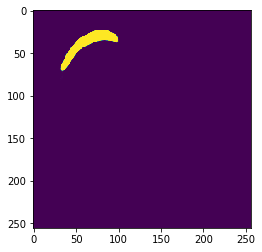

In [0]:
plt.imshow(prediction[0].squeeze())

<h3> Réel pneumothorax </h3>

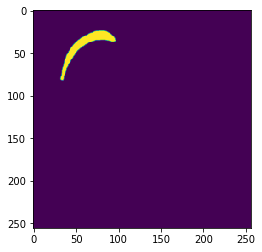

In [0]:
plt.imshow(resize_im(mask.rle2mask(get_code(X_val[21])[0], 1024, 1024).T)/255.)